In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.integrate import solve_ivp

### P1: Loading instrument time series data into notebook

You can find piano.txt and trumpet.txt here: http://www-personal.umich.edu/~mejn/cp/programs.html

In [2]:
import pandas as pd

piano = pd.read_csv('piano.txt', header = None).to_numpy()

Text(0, 0.5, 'amplitude')

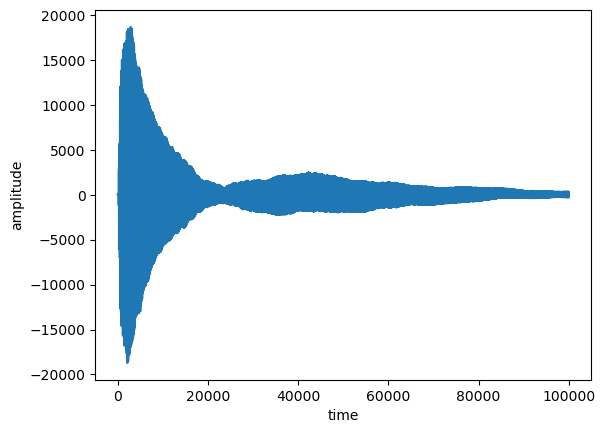

In [3]:
plt.plot(np.arange(0, len(piano)), piano)
plt.xlabel('time')
plt.ylabel('amplitude')

### Doing a FFT using scipy

Here I show how to do a FFT using scipy. I take the FFT of a pure sine wave with frequency of 3 Hz.

Text(0, 0.5, 'magnitude')

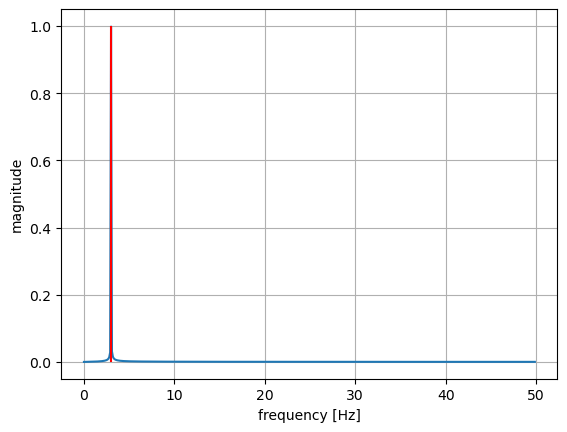

In [4]:
t = np.linspace(0, 10, 1000)
data  = np.sin(2*np.pi*3*t)
N = len(data)

# sample spacing

T = t[1]-t[0]

yf = fft(data)

xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.vlines(3, 0, 1, color = 'red')

plt.xlabel('frequency [Hz]')
plt.ylabel('magnitude')

### Let's integrate an equation of motion using scipy solve_ivp

I'll integrate this differential equation:

\begin{equation}
\frac{d^2 z}{dt^2} = \frac{F_0}{m}\sin(2kz)-\frac{\gamma}{m}z-g
\end{equation}

You need to feed the list y = [dz/dt, z, 1] into solve_ivp to solve for z

Use the integration functions below with the function derivative_lorenz instead of derivative_func and output x, z (instead of t,z) to find the lorenz attractor!

In [5]:
def derivative_func(t, y):
    """1st derivatives of the vector y = [dz/dt, z, 1] = [mm/s, mm, 1]
    
    Derivative function used for integration of damped harmonic oscillator
    
    """
    gamma_m = 1 #drag coefficient
    F0_m = 10 # force to mass ratio
    k = 10 # wavenumber
    ext_force = 1 # gravitational force on particle
    return [-F0_m*np.sin(2*k*y[1])-gamma_m*y[0]-ext_force, y[0], 0] 

In [6]:
def numerical_traj_ex(t_span, y0, t):
    """
    
    Integrate equation of motion and return time, position tuple
    
    """
    #deltaomega = 2*np.pi*deltaf
    sol4 = solve_ivp(derivative_func, t_span, y0, t_eval = t,  \
                     method = 'LSODA')
    # Radau and LSODA yield the same results

    t = sol4.t
    y = sol4.y
    v = y[0,:]
    z = y[1,:]
    return t, z

In [7]:
def derivative_lorenz(t,r):
    """1st derivatives of the vector y = [, z, 1] = [mm/s, mm, 1]
    
    Derivative function used for integration of damped harmonic oscillator
    
    """
    sigma_ = 10
    r_=28
    b_=8/3
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma_*(y-x)
    fy = r_*x - y - x*z
    fz = x*y - b_*z
    return [fx, fy, fz] 

In [8]:
exp_fps = 1000 # samples per second
t_span = [0, 3] # simulate system for 3 seconds
t = np.arange(*t_span, 1/exp_fps)
y0 = [0,0,0]
t, z = numerical_traj_ex(t_span, y0, t)

Text(0.5, 0, 't [s]')

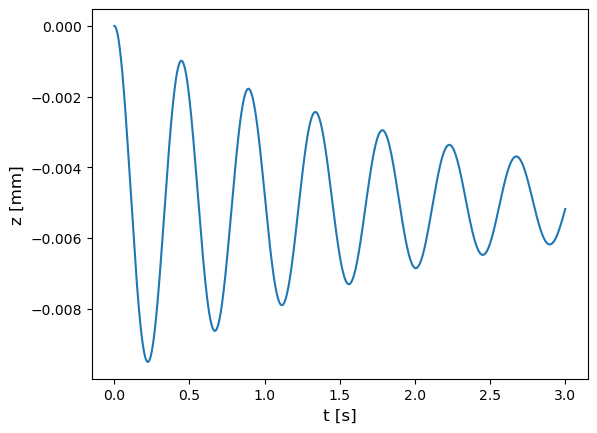

In [9]:
# plot the trajectory
plt.plot(t,z)
plt.ylabel('z [mm]', fontsize = 12)
plt.xlabel('t [s]', fontsize = 12)